<a href="https://colab.research.google.com/github/sarahwehkamp/HR-Employee-Data-Analysis/blob/main/Clean-HR-Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file from your local machine
uploaded = files.upload()

# Get the name of the uploaded file
file_name = list(uploaded.keys())[0]

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(file_name)
    print(f"\nSuccessfully loaded the dataset: {file_name}")
    print("\nFirst few rows of the DataFrame:")
    print(df.head())
    print("\nInformation about the DataFrame:")
    print(df.info())
    print("\nDescriptive statistics for numerical columns:")
    print(df.describe())
    print("\nNumber of missing values per column:")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please make sure you uploaded it correctly.")
except Exception as e:
    print(f"An error occurred: {e}")

Saving HRDataset_v14.csv to HRDataset_v14 (1).csv

Successfully loaded the dataset: HRDataset_v14 (1).csv

First few rows of the DataFrame:
              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5 

# Investigate missing ManagerID

In [ ]:
missing_manager_id = df[df['ManagerID'].isnull()]
print(missing_manager_id)

          Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
19        Becker, Scott  10277          0                0         1   
30   Buccheri, Joseph    10184          0                0         1   
44    Chang, Donovan  E  10154          0                0         1   
88      Fancett, Nicole  10136          0                0         0   
135     Hutter, Rosalie  10214          0                3         0   
177   Manchester, Robyn  10077          1                1         0   
232     Rivera, Haley    10011          1                1         0   
251      Sewkumar, Nori  10071          0                0         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
19             3       5            3                       0   53250  ...   
30             1       5            3                       0   65288  ...   
44             1       5            3                       0   60380  ...   
88             1       5            3  

In [ ]:
missing_manager_id = df[df['ManagerID'].isnull()]
print(missing_manager_id[['Employee_Name', 'Department', 'Position', 'ManagerName']])

          Employee_Name         Department                  Position  \
19        Becker, Scott  Production          Production Technician I   
30   Buccheri, Joseph    Production         Production Technician II   
44    Chang, Donovan  E  Production          Production Technician I   
88      Fancett, Nicole  Production         Production Technician II   
135     Hutter, Rosalie  Production         Production Technician II   
177   Manchester, Robyn  Production         Production Technician II   
232     Rivera, Haley    Production          Production Technician I   
251      Sewkumar, Nori  Production          Production Technician I   

        ManagerName  
19   Webster Butler  
30   Webster Butler  
44   Webster Butler  
88   Webster Butler  
135  Webster Butler  
177  Webster Butler  
232  Webster Butler  
251  Webster Butler  


# Impute missing ManagerID

In [ ]:
webster_butler_id = df[df['ManagerName'] == 'Webster Butler']['ManagerID'].iloc[0]
print(f"The ManagerID for Webster Butler is: {webster_butler_id}")

The ManagerID for Webster Butler is: 39.0


In [ ]:
webster_butler_id = df[df['ManagerName'] == 'Webster Butler']['ManagerID'].iloc[0]
print(f"The ManagerID for Webster Butler is: {webster_butler_id}")

The ManagerID for Webster Butler is: 39.0


In [ ]:
df.loc[df['ManagerID'].isnull(), 'ManagerID'] = webster_butler_id

# Verify that the missing values have been filled (again, for good measure)
print("\nNumber of missing values in ManagerID after imputation (using .loc):")
print(df['ManagerID'].isnull().sum())


Number of missing values in ManagerID after imputation (using .loc):
0


# Check for duplicate rows

In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# If there are duplicates, you can remove them using:
# df.drop_duplicates(inplace=True)
# print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# Convert date columns to datetime objects

In [ ]:
# Convert date columns to datetime objects
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['DateofHire'] = pd.to_datetime(df['DateofHire'], errors='coerce')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'], errors='coerce')

# Verify the data type conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

<ipython-input-12-8c3588b0d16e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


# Examine unique values in categorical columns

In [ ]:
# Get unique values for the 'Department' column
print("Unique values in 'Department':")
print(df['Department'].unique())

# Get unique values for the 'Position' column
print("\nUnique values in 'Position':")
print(df['Position'].unique())

# Get unique values for the 'EmploymentStatus' column
print("\nUnique values in 'EmploymentStatus':")
print(df['EmploymentStatus'].unique())

# Get unique values for the 'RecruitmentSource' column
print("\nUnique values in 'RecruitmentSource':")
print(df['RecruitmentSource'].unique())

# You can explore other categorical columns as well, like 'State', 'Sex', 'MaritalDesc', etc.

Unique values in 'Department':
['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']

Unique values in 'Position':
['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' 'CIO']

Unique values in 'EmploymentStatus':
['Active' 'Voluntarily Terminated' 'Terminated for Cause']

Unique values in 'RecruitmentSource':
['LinkedIn' 'Indeed' 'Google Search' 'Employee Referral'
 'Diver

In [ ]:
# Remove leading/trailing whitespace from the 'Position' column
df['Position'] = df['Position'].str.strip()

# Verify that the change has been made
print("\nUnique values in 'Position' after stripping whitespace:")
print(df['Position'].unique())


Unique values in 'Position' after stripping whitespace:
['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'CIO']


In [ ]:
print(df.describe())

              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   
std       89.922189    0.490423         0.943239    0.496435     1.794383   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
min      1.000000     1.000000                0.000000   45046.000000   
25%      5.000

In [ ]:
print(df['Department'].value_counts())
print("\n", df['Position'].value_counts().head(10)) # Top 10 positions
print("\n", df['EmploymentStatus'].value_counts())
print("\n", df['PerformanceScore'].value_counts())

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

 Position
Production Technician I     137
Production Technician II     57
Area Sales Manager           27
Production Manager           14
Software Engineer            10
Data Analyst                  8
IT Support                    8
Database Administrator        5
Sr. Network Engineer          5
Network Engineer              5
Name: count, dtype: int64

 EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64

 PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64


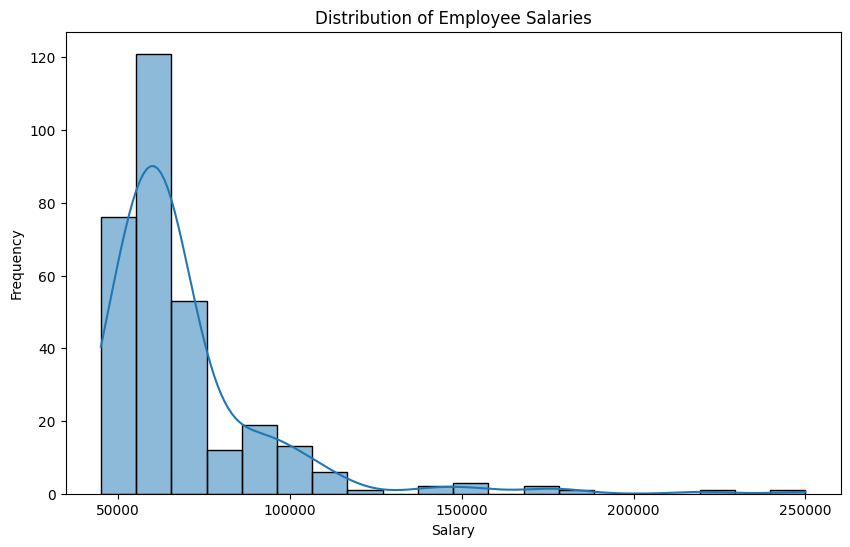

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# We'll calculate age later from DOB

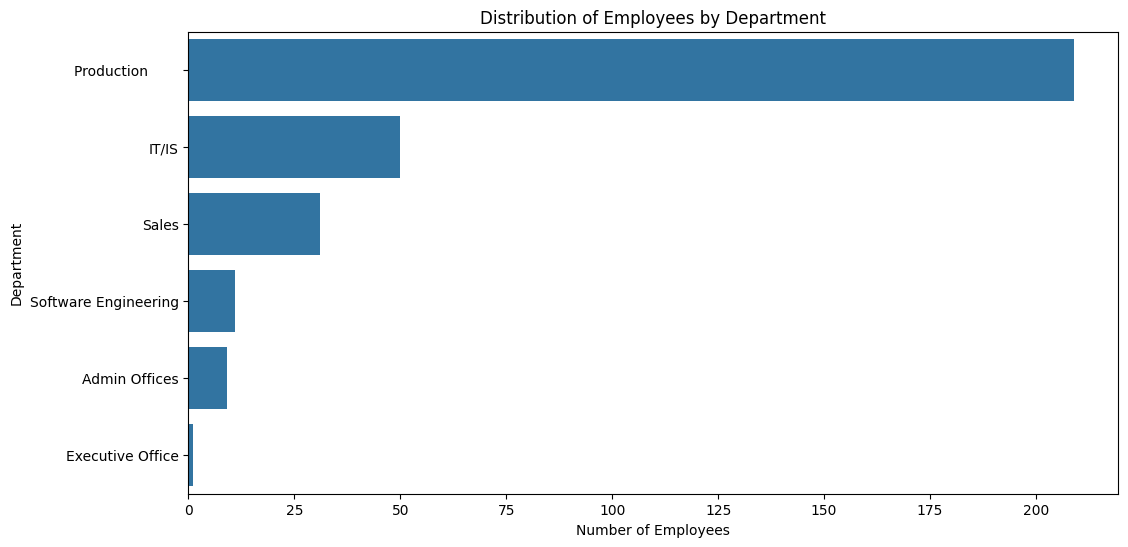

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Department', data=df, order=df['Department'].value_counts().index)
plt.title('Distribution of Employees by Department')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.show()

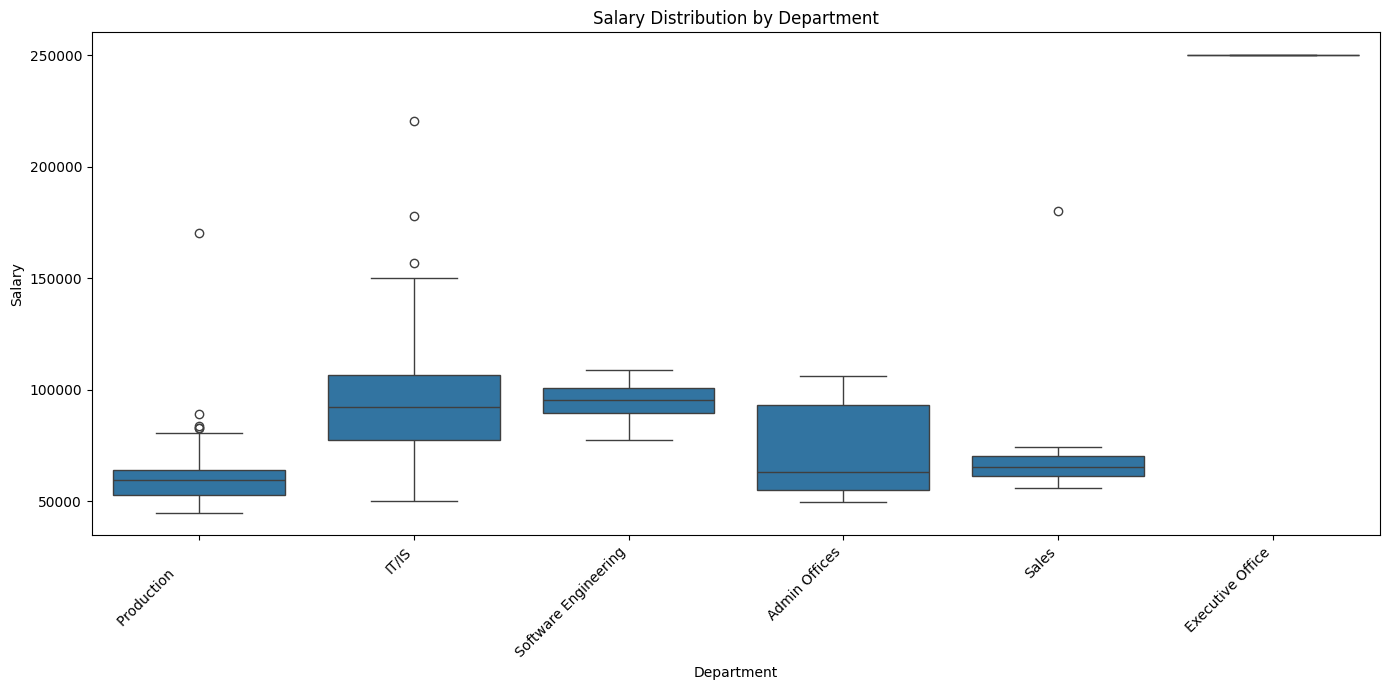

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from datetime import datetime

# Convert 'DateofHire' and 'DateofTermination' to datetime objects (re-run in case)
df['DateofHire'] = pd.to_datetime(df['DateofHire'], errors='coerce')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')

# Define a reference date for calculating tenure for active employees
reference_date = df['DateofHire'].max() + pd.Timedelta(days=30) # A bit after the last hire date to be safe

# Calculate Tenure in years
df['Tenure'] = (df['DateofTermination'] - df['DateofHire']).dt.days / 365.25
df['Tenure'] = df['Tenure'].fillna(((reference_date - df['DateofHire']).dt.days / 365.25))

# Create Employment Status Flag
df['EmploymentStatus_Flag'] = df['DateofTermination'].apply(lambda x: 'Active' if pd.isnull(x) else 'Terminated')

# Display the new columns and some info
print(df[['Employee_Name', 'DateofHire', 'DateofTermination', 'Tenure', 'EmploymentStatus_Flag']].head())
print("\nValue counts for EmploymentStatus_Flag:")
print(df['EmploymentStatus_Flag'].value_counts())

              Employee_Name DateofHire DateofTermination     Tenure  \
0       Adinolfi, Wilson  K 2011-07-05               NaT   7.093771   
1  Ait Sidi, Karthikeyan    2015-03-30        2016-06-16   1.215606   
2         Akinkuolie, Sarah 2011-07-05        2012-09-24   1.223819   
3              Alagbe,Trina 2008-01-07               NaT  10.584531   
4          Anderson, Carol  2011-07-11        2016-09-06   5.158111   

  EmploymentStatus_Flag  
0                Active  
1            Terminated  
2            Terminated  
3                Active  
4            Terminated  

Value counts for EmploymentStatus_Flag:
EmploymentStatus_Flag
Active        207
Terminated    104
Name: count, dtype: int64


In [ ]:
import pandas as pd
from datetime import datetime

# Ensure 'DOB' is in datetime format (re-run in case)
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Get the current date for age calculation
current_date = datetime.now() # Or a specific reference date if needed for the project context

# Calculate Age in years
df['Age'] = (current_date - df['DOB']).dt.days / 365.25

# Round the age to the nearest whole number
df['Age'] = df['Age'].round().astype(int)

# Display the new column and some info
print(df[['Employee_Name', 'DOB', 'Age']].head())
print("\nDescriptive statistics for Age:")
print(df['Age'].describe())

              Employee_Name        DOB  Age
0       Adinolfi, Wilson  K 1983-07-10   42
1  Ait Sidi, Karthikeyan    1975-05-05   50
2         Akinkuolie, Sarah 1988-09-19   37
3              Alagbe,Trina 1988-09-27   37
4          Anderson, Carol  1989-09-08   36

Descriptive statistics for Age:
count    311.000000
mean      16.974277
std       38.610704
min      -50.000000
25%      -35.000000
50%       38.000000
75%       43.000000
max       50.000000
Name: Age, dtype: float64


In [ ]:
df_sorted_age = df.sort_values(by='Age')
print(df_sorted_age[['Employee_Name', 'DOB', 'Age']].head())
print(df_sorted_age[['Employee_Name', 'DOB', 'Age']].tail())

         Employee_Name        DOB  Age
241     Rose, Ashley   2074-12-05  -50
195  Moumanil, Maliki  2074-12-01  -50
179     Mangal, Debbie 2074-11-07  -50
247      Sadki, Nore   2074-12-21  -50
78         Dunn, Amy   2073-11-28  -49
                Employee_Name        DOB  Age
264            Spirea, Kelley 1975-09-30   50
95              Forrest, Alex 1975-07-07   50
280          Thibaud, Kenneth 1975-09-16   50
276        Tavares, Desiree   1975-04-03   50
1    Ait Sidi, Karthikeyan    1975-05-05   50


In [ ]:
import numpy as np

# Set 'Age' to NaN where it's negative
df.loc[df['Age'] < 0, 'Age'] = np.nan

# Verify the change
print(df_sorted_age[['Employee_Name', 'DOB', 'Age']].head()) # Should now show NaN for negative ages
print("\nDescriptive statistics for Age after handling errors:")
print(df['Age'].describe())
print("\nNumber of NaN values in Age:")
print(df['Age'].isnull().sum())

         Employee_Name        DOB  Age
241     Rose, Ashley   2074-12-05  -50
195  Moumanil, Maliki  2074-12-01  -50
179     Mangal, Debbie 2074-11-07  -50
247      Sadki, Nore   2074-12-21  -50
78         Dunn, Amy   2073-11-28  -49

Descriptive statistics for Age after handling errors:
count    220.000000
mean      41.554545
std        4.363791
min       33.000000
25%       38.000000
50%       41.000000
75%       45.000000
max       50.000000
Name: Age, dtype: float64

Number of NaN values in Age:
91


In [ ]:
from google.colab import files
import pandas as pd

# Save the cleaned DataFrame to a new CSV file in Colab's environment
cleaned_file_name = 'HRDataset_cleaned.csv'
df.to_csv(cleaned_file_name, index=False)

print(f"\nCleaned dataset saved to: {cleaned_file_name} in Colab.")

# Trigger the download to your local machine
files.download(cleaned_file_name)

print("\nFile download initiated. Please check your browser's download settings.")


Cleaned dataset saved to: HRDataset_cleaned.csv in Colab.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


File download initiated. Please check your browser's download settings.
